In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [49]:
dataset=pd.read_csv("Abnormality.csv")

In [50]:
dataset

,patient,features,features.1,features.2,features.3,features.4,features.5,features.6,features.7,features.8,...,features.109,features.110,features.111,features.112,features.113,features.114,features.115,features.116,features.117,class
0,abnormality1,0.193085,0.452288,0.415949,0.139162,0.193064,0.473900,0.453628,0.226506,0.486974,...,0.325062,0.390048,0.068589,0.239278,0.325062,0.221802,0.325062,0.112128,0.068589,1
1,abnormality2,0.455707,0.400769,0.232735,0.043859,0.171187,0.397085,0.435364,0.198269,0.478201,...,0.415000,0.152374,0.009217,0.231085,0.415000,0.130759,0.415000,0.085114,0.009217,1
2,abnormality3,0.216496,0.322787,0.321861,0.025466,0.351955,0.304562,0.190576,0.242715,0.059984,...,0.588951,0.264538,0.233772,0.360888,0.588951,0.343463,0.588951,0.207494,0.233772,1
3,abnormality4,0.103720,0.287073,0.297168,0.069759,0.341625,0.322145,0.197875,0.327782,0.683889,...,0.219669,0.205674,0.121860,0.140276,0.219669,0.043324,0.219669,0.016444,0.121860,0
4,abnormality5,0.180818,0.309175,0.204455,0.213910,0.257745,0.465277,0.274290,0.177519,0.218036,...,0.199044,0.056704,0.122244,0.547757,0.199044,0.273875,0.199044,0.468982,0.122244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,abnormality93,0.704218,0.441169,0.473228,0.160781,0.249248,0.535597,0.228981,0.155537,0.402664,...,0.424211,0.167415,0.164574,0.266798,0.424211,0.268330,0.424211,0.039538,0.164574,0
93,abnormality94,0.009908,0.610792,0.091674,0.013564,0.082230,0.333644,0.473475,0.330545,0.350644,...,0.458550,0.364114,0.124643,0.527569,0.458550,0.288735,0.458550,0.246396,0.124643,0
94,abnormality95,0.315815,0.438394,0.471392,0.050065,0.028890,0.416679,0.320198,0.310576,0.477753,...,0.004295,0.264463,0.205981,0.345524,0.004295,0.402601,0.004295,0.169348,0.205981,0
95,abnormality96,0.494521,0.387770,0.417113,0.240611,0.013166,0.513736,0.311139,0.270945,0.490570,...,0.342005,0.106542,0.058091,0.323474,0.342005,0.251820,0.342005,0.017518,0.058091,0


In [51]:
#data
x=dataset.iloc[:,1:119]

In [52]:
x.values

array([[0.19308489, 0.45228756, 0.41594893, ..., 0.3250623 , 0.11212818,
        0.06858944],
       [0.45570698, 0.4007686 , 0.2327345 , ..., 0.41500016, 0.08511398,
        0.00921664],
       [0.21649563, 0.32278692, 0.32186135, ..., 0.58895088, 0.20749388,
        0.2337724 ],
       ...,
       [0.31581502, 0.4383938 , 0.47139239, ..., 0.00429539, 0.16934839,
        0.2059809 ],
       [0.49452136, 0.38777006, 0.41711293, ..., 0.34200507, 0.01751812,
        0.05809065],
       [0.41862597, 0.46284019, 0.51459679, ..., 0.77696321, 0.07571643,
        0.18424714]])

In [53]:
#target
y=dataset.iloc[:,-1]

In [54]:
y.values

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, x):
        # Mean centering
        self.mean = np.mean(x, axis=0)
        x = x - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(x.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, x):
        # project data
        x = x - self.mean
        return np.dot(x, self.components.T)

In [56]:
pca = PCA(3)
pca.fit(x)
x_projected = pca.transform(x)

In [57]:
print(x_projected)

[[-1.66449841e+00+0.j  6.71522489e-01+0.j -6.20086553e-01+0.j]
 [-1.63674589e+00+0.j  7.46053646e-01+0.j  1.91531593e-01+0.j]
 [-1.26174286e+00+0.j  9.47250302e-01+0.j  3.96574129e-02+0.j]
 [-1.88707276e+00+0.j  5.58899120e-01+0.j -3.49833366e-01+0.j]
 [-2.03215613e+00+0.j  6.71988076e-01+0.j  2.15068890e-01+0.j]
 [-1.68413340e+00+0.j  1.94552554e-01+0.j -3.85046959e-01+0.j]
 [-1.86623851e+00+0.j  9.39927748e-01+0.j  4.96724664e-01+0.j]
 [-1.24314411e+00+0.j  8.88280255e-01+0.j  1.06532846e-01+0.j]
 [-1.11352431e+00+0.j  1.19807564e+00+0.j -5.80952742e-01+0.j]
 [-1.64653989e+00+0.j  1.14612184e+00+0.j  1.64969982e-02+0.j]
 [-1.68358356e+00+0.j  1.21182330e+00+0.j -6.32181508e-03+0.j]
 [-1.81868443e+00+0.j  7.32209888e-01+0.j  9.55404355e-01+0.j]
 [-2.00668274e+00+0.j  7.04796168e-01+0.j  9.43016587e-02+0.j]
 [-1.79562983e+00+0.j  2.68851074e-01+0.j  3.27093413e-01+0.j]
 [-2.56958458e+00+0.j -1.69167728e-01+0.j  3.59356555e-01+0.j]
 [-1.44697941e+00+0.j  9.75952291e-01+0.j -1.11034341e-

In [58]:
x.shape

(97, 118)

In [59]:
x_projected.shape

(97, 3)

In [60]:
x1 = x_projected[:, 0]
x2 = x_projected[:, 1]

<IPython.core.display.Javascript object>


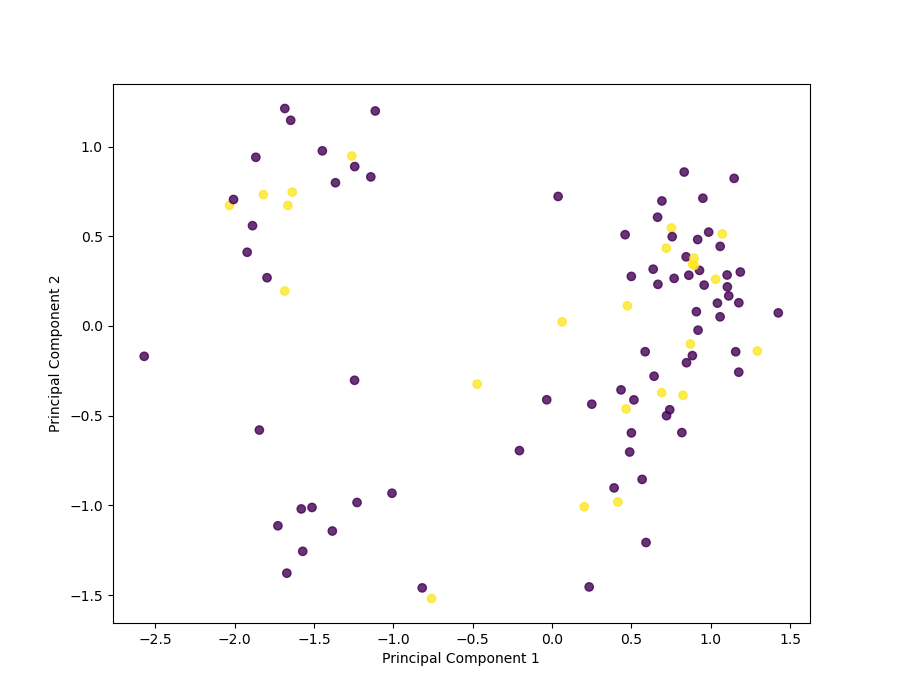

In [46]:
plt.figure(figsize=(9,7))
plt.scatter(x1, x2,c=y,  alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [43]:
#3D PLOT

In [47]:
'''%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize']=10
ax.plot(,pc20,pc30,'o',markersize=8,alpha=0.5,color='blue',label="CLASS 0")
ax.plot(pc11,pc21,pc31,'o',markersize=8,alpha=0.5,color='red',label="CLASS 1")
ax.set_xlabel(' PC1')
ax.set_ylabel(' PC2')
ax.set_zlabel(' PC3')
plt.title('3D projection')
ax.legend(loc='upper right')
plt.savefig('3Dfigure.png') 
plt.show()'''

'%matplotlib notebook\nfrom matplotlib import pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\nfrom mpl_toolkits.mplot3d import proj3d\n\nfig=plt.figure(figsize=(8,8))\nax=fig.add_subplot(111,projection=\'3d\')\nplt.rcParams[\'legend.fontsize\']=10\nax.plot(,pc20,pc30,\'o\',markersize=8,alpha=0.5,color=\'blue\',label="CLASS 0")\nax.plot(pc11,pc21,pc31,\'o\',markersize=8,alpha=0.5,color=\'red\',label="CLASS 1")\nax.set_xlabel(\' PC1\')\nax.set_ylabel(\' PC2\')\nax.set_zlabel(\' PC3\')\nplt.title(\'3D projection\')\nax.legend(loc=\'upper right\')\nplt.savefig(\'3Dfigure.png\') \nplt.show()'